# Data import

In [566]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
import seaborn as sns

In [567]:
sns.set_theme(style='whitegrid')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format ='svg'

In [568]:
raw = pd.read_csv("http://hilpisch.com/tr_eikon_eod_data.csv", index_col=0, parse_dates=True)

In [569]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [570]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [571]:
raw.tail()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58
2018-06-28,185.50,98.63,49.25,1701.45,223.42,270.89,2716.31,16.85,1.1567,1247.88,21.93,118.22
2018-06-29,185.11,98.61,49.71,1699.80,220.57,271.28,2718.37,16.09,1.1683,1252.25,22.31,118.65


In [572]:
symbol = 'AAPL.O'

In [573]:
data = (pd.DataFrame(raw[symbol]).dropna())

In [574]:
data.head()

,AAPL.O
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827


In [575]:
SMA1 = 42
SMA2 = 252

In [576]:
data['SMA1'] = data[symbol].rolling(SMA1).mean()
data['SMA2'] = data[symbol].rolling(SMA2).mean()

<Axes: xlabel='Date'>

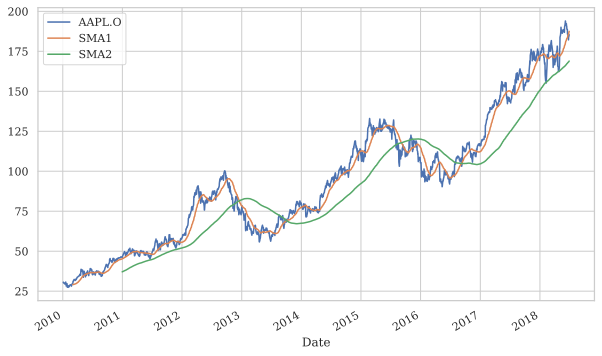

In [577]:
data.plot(figsize=(10,6))

In [578]:
data.dropna(inplace=True)

In [579]:
data.head()

,AAPL.O,SMA1,SMA2
Date,,,
2010-12-31,46.079954,45.280967,37.120735
2011-01-03,47.081381,45.349708,37.186246
2011-01-04,47.327096,45.412599,37.252521
2011-01-05,47.714238,45.466102,37.322266
2011-01-06,47.675667,45.522565,37.392079


In [580]:
data['Position'] = np.where(data["SMA1"] > data['SMA2'], 1, -1)

In [581]:
data.tail()

,AAPL.O,SMA1,SMA2,Position
Date,,,,
2018-06-25,182.17,185.606190,168.265556,1
2018-06-26,184.43,186.087381,168.418770,1
2018-06-27,184.16,186.607381,168.579206,1
2018-06-28,185.50,187.089286,168.736627,1
2018-06-29,185.11,187.470476,168.901032,1


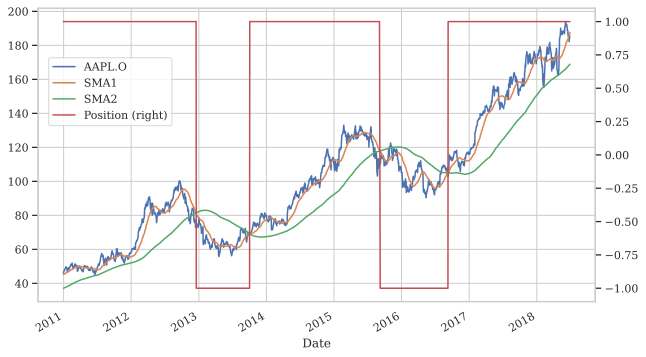

In [582]:
ax = data.plot(secondary_y='Position', figsize=(10,6))
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

# Vectorized Backtesting

In [583]:
data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))

In [584]:
data['Strategy'] = data['Position'].shift(1) * data['Returns']

In [585]:
data.dropna(inplace=True)

In [586]:
data.head()

,AAPL.O,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,
2011-01-03,47.081381,45.349708,37.186246,1,0.021500,0.021500
2011-01-04,47.327096,45.412599,37.252521,1,0.005205,0.005205
2011-01-05,47.714238,45.466102,37.322266,1,0.008147,0.008147
2011-01-06,47.675667,45.522565,37.392079,1,-0.000809,-0.000809
2011-01-07,48.017095,45.582089,37.462453,1,0.007136,0.007136


In [587]:
np.exp(data[['Returns', 'Strategy']].sum())

Returns     4.017148
Strategy    5.811299
dtype: float64

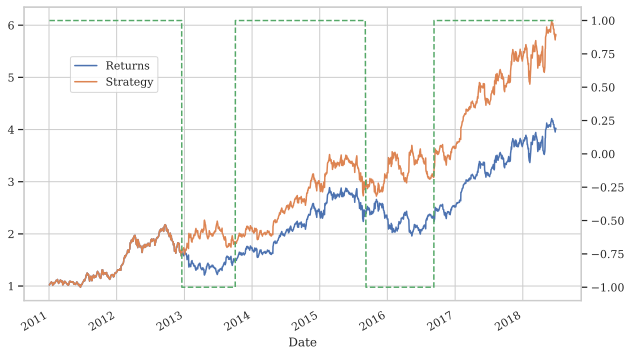

In [588]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

# Optimization

In [589]:
from itertools import product

In [590]:
sma1 = range(20, 61, 4)

In [591]:
sma2 = range(180, 280, 10)

In [592]:
results_list = []

for SMA1, SMA2 in product(sma1, sma2):
    data = (pd.DataFrame(raw[symbol]).dropna())
    data['Returns'] = np.log(data[symbol] / data[symbol].shift(1))
    data['SMA1'] = data[symbol].rolling(SMA1).mean()
    data['SMA2'] = data[symbol].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data["SMA1"] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)

    perf = np.exp(data[['Returns', 'Strategy']].sum())
    term_df = pd.DataFrame(
        {
            'SMA1' : SMA1,
            'SMA2' : SMA2,
            'MARKET' : perf['Returns'],
            'STATEGY' : perf['Strategy'],
            'OUT' : perf['Strategy'] - perf['Returns']
        }, index=[0]
    )
    results_list.append(term_df)

results = pd.concat(results_list, ignore_index=True)

In [593]:
results.head()

,SMA1,SMA2,MARKET,STATEGY,OUT
0,20,180,4.574979,4.326431,-0.248548
1,20,190,4.650342,5.218921,0.568579
2,20,200,4.074753,5.300207,1.225454
3,20,210,4.259883,5.219410,0.959527
4,20,220,4.220272,5.259889,1.039616


In [594]:
results.sort_values('OUT', ascending=False).head()

,SMA1,SMA2,MARKET,STATEGY,OUT
51,40,190,4.650342,7.175173,2.524831
36,32,240,4.045619,6.558690,2.513071
54,40,220,4.220272,6.544266,2.323994
42,36,200,4.074753,6.389627,2.314874
50,40,180,4.574979,6.857989,2.283010
